# Seja um investidor na bolsa de valores com Python

**Daniele Nazaré**

> Nessa Talk iremos descobrir recursos e ferramentas pré prontas para ajudar traders formularem estratégias na bolsa de valores. Mas o que python tem de tão bom que eu não sei? Diversas ferramentas para matemática financeira, análise de risco na bolsa de valores, ferramentas que geram séries temporais, e várias bibliotecas estatística. Vale a pena assistir essa Talk para entender o universo de Trading e o que python tem a oferecer para os investidores.

**Base de dados usada foi do Yahoo Finanças**

   [Site Yahoo Finanças](https://br.financas.yahoo.com/industries/Energia-Petroleo-Gas)
   

## Principais Bibliotecas

   1. **Pandas** -
   2. **Pandas_Datareader** - Responsável por ler uma base de dados em um servidor externo e armazenar os dados em um objeto do tipo DataFrame 
   3. **Numpy** - Biblioteca usada para computação numérica e científica
   4. **Matplotlib** - Biblioteca para visualização dos dados em um gráfico
   5. **DateTime** - Biblioteca para formatação de data
   


In [69]:
import pandas as pd
from pandas_datareader import data as dt #Obter dados das cotações no Yahoo Finnance
import numpy as np
import matplotlib.pyplot as plt

import datetime

%matplotlib inline

In [70]:
#Formatação e definição da data em um determinado período de tempo
dataInicio = datetime.datetime(2019,1,1)
dataFim = datetime.datetime(2020,1,1)

### Acesso a Base de dados
    
   Os dados estão organizados no objeto DataFrame e abaixo é acessado os dados da Bolsa de Valores da Multinacional **'TSLA'-Tesla**

In [89]:

yahooData = dt.get_data_yahoo('TSLA', dataInicio, dataFim)




 ### Campos da Tabela  
   
   1. **High** - O valor(reais) mais alto do dia
   2. **Low** - O valor(reais) mais baixo do dia 
   3. **Open** - O primeiro valor(reais) do dia quando a Bolsa abriu
   4. **Close** - O último valor(reais) do dia quando a Bolsa fechou
   5. **Adj Close** - O valor(reais) do fechamento ajustado no dia

In [90]:
yahooData

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500,67.070000
...,...,...,...,...,...,...
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996


In [91]:
yahooData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,55.529960,53.722508,54.605627,54.706040,4.579461e+07,54.706040
std,10.639957,10.412554,10.469095,10.606053,2.382350e+07,10.606053
min,37.335999,35.397999,36.220001,35.793999,1.232800e+07,35.793999
25%,46.954001,45.502499,46.246501,46.444001,3.028275e+07,46.444001
50%,52.796001,51.267000,51.986000,52.059000,3.872175e+07,52.059000
75%,63.230000,60.624999,61.630001,62.382000,5.325762e+07,62.382000
max,87.061996,85.269997,87.000000,86.188004,1.500305e+08,86.188004


In [75]:
#Taxa simples de retorno

yahooData['Retorno'] = (yahooData['Adj Close'] / yahooData['Adj Close'].shift(1) - 1) *100 

#Rentabilidade Anual

yahooData['Retorno'].max()

17.669231691554145

In [76]:
yahooData[yahooData['Retorno'] == yahooData['Retorno'].max()]

,High,Low,Open,Close,Volume,Adj Close,Retorno
Date,,,,,,,
2019-10-24,60.986,57.84,59.674,59.936001,148604500,59.936001,17.669232


In [77]:
yahooData['Retorno'].min()

-13.613714821289403

In [78]:
yahooData[yahooData['Retorno'] == yahooData['Retorno'].min()]

,High,Low,Open,Close,Volume,Adj Close,Retorno
Date,,,,,,,
2019-07-25,46.900002,45.110001,46.700001,45.764,112091500,45.764,-13.613715


In [10]:
#Taxa de Retorno Anual
yahooData['Retorno'].mean() * 250 

30.382096915538007

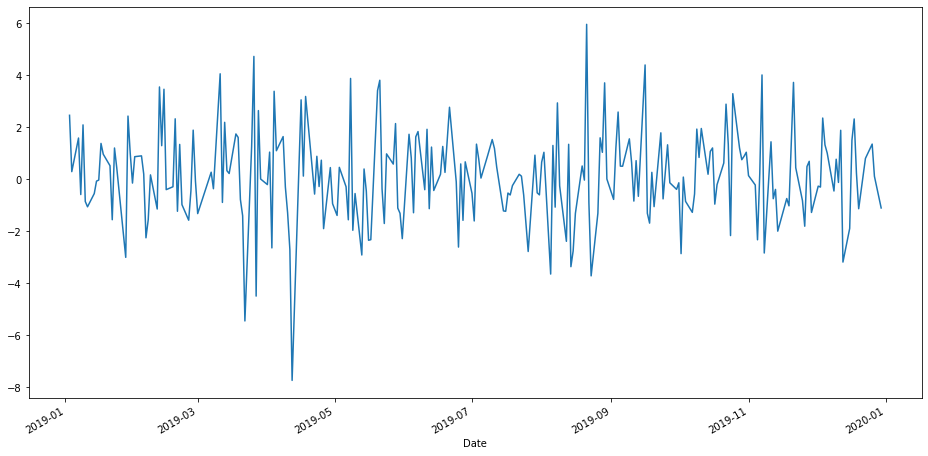

In [11]:
yahooData['Retorno'].plot(figsize=(16,8))

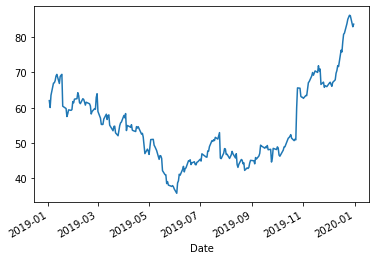

In [79]:
yahooData['Adj Close'].plot()

In [81]:
yahooData['Variacao'] = yahooData['High'] - yahooData['Low']
yahooData

,High,Low,Open,Close,Volume,Adj Close,Retorno,Variacao
Date,,,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000,62.023998,NaN,3.266003
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000,60.071999,-3.147168,2.403999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500,63.537998,5.769742,3.053997
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000,66.991997,5.436115,3.798000
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500,67.070000,0.116436,3.398003
...,...,...,...,...,...,...,...,...
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003,1.438387,2.556000
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004,1.338037,1.426003
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996,-0.129957,1.839996


In [82]:
yahooData.head()



,High,Low,Open,Close,Volume,Adj Close,Retorno,Variacao
Date,,,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000,62.023998,NaN,3.266003
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000,60.071999,-3.147168,2.403999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500,63.537998,5.769742,3.053997
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000,66.991997,5.436115,3.798000
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500,67.070000,0.116436,3.398003


In [83]:

yahooData.tail()

,High,Low,Open,Close,Volume,Adj Close,Retorno,Variacao
Date,,,,,,,,
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003,1.438387,2.556000
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004,1.338037,1.426003
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996,-0.129957,1.839996
2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002,-3.643285,3.948006
2019-12-31,84.258003,80.416000,81.000000,83.666000,51428500,83.666000,0.875329,3.842003


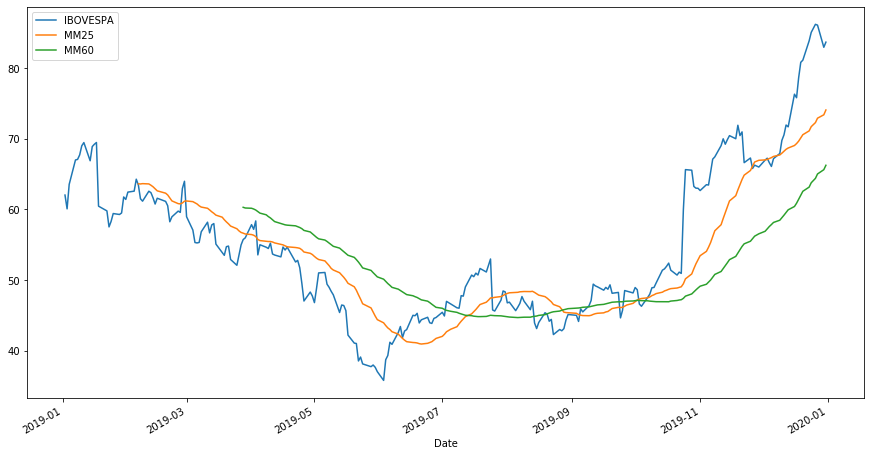

In [94]:
yahooData['Close'].plot(figsize=(15,8),label='IBOVESPA')
yahooData['Close'].rolling(25).mean().plot(label='MM25')
yahooData['Close'].rolling(60).mean().plot(label='MM60')#Media móvel
plt.legend()

In [93]:
dadosTeslaJulho = yahooData[yahooData.index.month == 7 ]

dadosTeslaJulho

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,46.619999,45.256001,46.042000,45.433998,41067000,45.433998
2019-07-02,45.830002,44.444000,45.778000,44.910000,46295000,44.910000
2019-07-03,48.313999,46.902000,47.877998,46.980000,71005500,46.980000
2019-07-05,47.090000,46.160000,46.914001,46.619999,35328500,46.619999
2019-07-08,46.450001,45.731998,46.248001,46.068001,29402500,46.068001
2019-07-09,46.200001,45.456001,45.793999,46.012001,30954000,46.012001
2019-07-10,47.787998,46.627998,46.830002,47.784000,45728500,47.784000
2019-07-11,48.299999,47.160000,47.627998,47.720001,37572000,47.720001
2019-07-12,49.076000,47.942001,47.950001,49.015999,46002500,49.015999


### Termos Importantes

    1. Renda Fixa 
        - forma de aplicação na qual os valores dos ativos já estão estipulados
        - menor risco 
    2. Renda variável
        - os valores oscilam de acordo com variáveis externas(pandemia, politica, economia global)
        - maior risco
    3. Taxa de Retorno sobre o investimento
      - Retorno Esperado - quanto a empresa irá ganhar com o dinheiro aplicado depois de um certo tempo, porém esse retorno é uma estimativa de alto risco quando se trata de renda variável, uma vez que você poderá ganhar mais ou menos dinheiro.
      - Retorno sobre o investimento realizado - Retorno sobre um investimento especifico realizado

    
    

In [87]:
#Extraindo, Lendo e manipulando dados de mais de uma empresa simultaneamente

organizacoesTI = ['AMZN', 'TSLA', 'AAPL','GOGL','MSFT']

#extraindo dados apenas o fechamento ajustado
dadosYahooEmpresas = dt.get_data_yahoo(organizacoesTI, dataInicio, dataFim)['Adj Close']

In [95]:
dadosYahooEmpresas

Symbols,AMZN,TSLA,AAPL,GOGL,MSFT
Date,,,,,
2019-01-02,1539.130005,62.023998,38.629097,5.813100,98.860214
2019-01-03,1500.280029,60.071999,34.781353,5.561168,95.223351
2019-01-04,1575.390015,63.537998,36.266144,6.055701,99.652115
2019-01-07,1629.510010,66.991997,36.185429,6.307634,99.779205
2019-01-08,1656.579956,67.070000,36.875229,6.531574,100.502670
...,...,...,...,...,...
2019-12-24,1789.209961,85.050003,70.580566,5.817995,156.137955
2019-12-26,1868.770020,86.188004,71.980911,5.827873,157.417786
2019-12-27,1869.800049,86.075996,71.953598,5.729095,157.705505


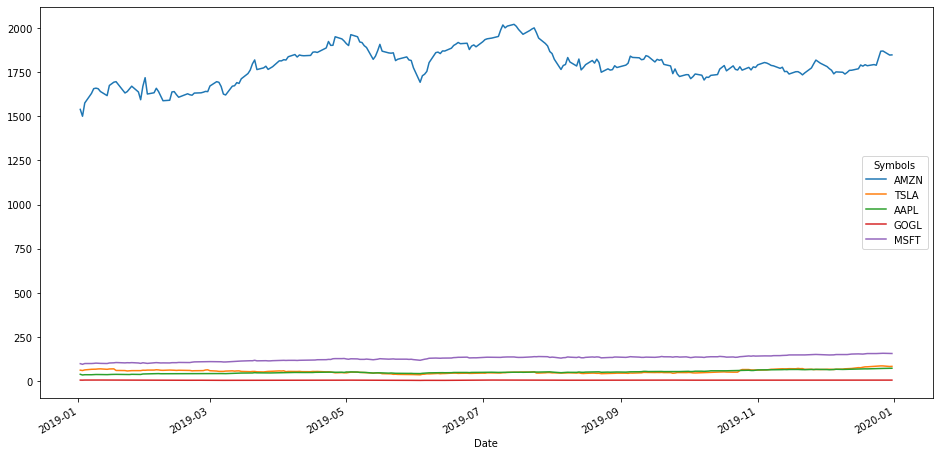

In [96]:
dadosYahooEmpresas.plot(figsize=(16,8))

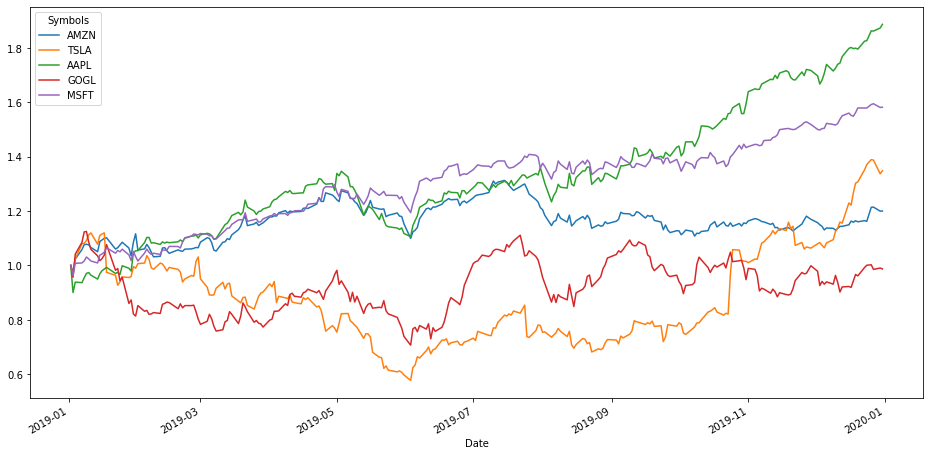

In [97]:
(dadosYahooEmpresas/ dadosYahooEmpresas.iloc[0]).plot(figsize=(16,8)) # normalização estatística dos dados
                                                                      # Aproximar os dados da distribuição normal
                                                                      # Normalizar facilita a comparação

In [98]:
rentabilidadeAcoes = (dadosYahooEmpresas.pct_change()*100).mean() *250 #rentabilidade anual

In [99]:
rentabilidadeAcoes

Symbols
AMZN    20.789339
TSLA    41.693871
AAPL    66.766638
GOGL     9.349971
MSFT    47.713662
dtype: float64

In [100]:
pesoAcoes = np.array([0.25,0.10,0.05,0.30,0.30])

In [101]:
pesoAcoes

array([0.25, 0.1 , 0.05, 0.3 , 0.3 ])

In [102]:
rentabilidade=np.dot(rentabilidadeAcoes,pesoAcoes)

In [103]:
rentabilidade #rentabilidade desse período

29.824143627945347

In [42]:
dadosYahooEmpresas.info()#ativos tem a mesma quantidade de dados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    252 non-null    float64
 1   TSLA    252 non-null    float64
 2   AAPL    252 non-null    float64
 3   GOGL    252 non-null    float64
 4   MSFT    252 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [43]:
retornoDadosEmpresas = dadosYahooEmpresas.pct_change() * 100
retornoDadosEmpresas

Symbols,AMZN,TSLA,AAPL,GOGL,MSFT
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-2.524152,-3.147168,-9.960740,-4.333869,-3.678794
2019-01-04,5.006398,5.769742,4.268928,8.892611,4.650923
2019-01-07,3.435339,5.436115,-0.222563,4.160263,0.127534
2019-01-08,1.661232,0.116436,1.906293,3.550299,0.725066
...,...,...,...,...,...
2019-12-24,-0.211380,1.438387,0.095062,0.856158,-0.019073
2019-12-26,4.446659,1.338037,1.984037,0.169786,0.819680
2019-12-27,0.055118,-0.129957,-0.037945,-1.694920,0.182775


In [46]:
risco = (np.dot(pesoAcoes.T, np.dot(retornoDadosEmpresas.cov()*250, pesoAcoes)))**.5
risco

23.339323607350586

## Outras Bibliotecas

    1. Statistics
    2. Numpy
    3. Pandas
    4. Matplotlib
    5. Scipy
    6. Math
    

## Plus Plus

In [104]:
dadosYahooEmpresas.describe() #Informações gerais do DataFrame

Symbols,AMZN,TSLA,AAPL,GOGL,MSFT
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1789.189206,54.706040,51.399533,5.363444,128.516596
std,101.313650,10.606053,8.737506,0.542263,15.199077
min,1500.280029,35.793999,34.781353,4.108437,95.223351
25%,1735.845032,46.444001,45.780482,4.954665,117.171322
50%,1786.450012,52.059000,50.099180,5.357755,133.254166
75%,1855.319946,62.382000,55.371859,5.779221,137.544125
max,2020.989990,86.188004,72.909500,6.540905,157.705505


In [105]:
type(dadosYahooEmpresas)#verificando o tipo de dados

pandas.core.frame.DataFrame

In [106]:
dadosYahooEmpresas.info()#Detalhes dos dados dentro da base

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    252 non-null    float64
 1   TSLA    252 non-null    float64
 2   AAPL    252 non-null    float64
 3   GOGL    252 non-null    float64
 4   MSFT    252 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [107]:
dadosYahooEmpresas.to_csv(index=False)#coloca os dados do DataFrame em um arquivo CSV 

'AMZN,TSLA,AAPL,GOGL,MSFT\n1539.1300048828125,62.02399826049805,38.62909698486328,5.813100337982178,98.86021423339844\n1500.280029296875,60.071998596191406,34.78135299682617,5.561168193817139,95.22335052490234\n1575.3900146484375,63.53799819946289,36.266143798828125,6.05570125579834,99.65211486816406\n1629.510009765625,66.99199676513672,36.185428619384766,6.307634353637695,99.77920532226562\n1656.5799560546875,67.06999969482422,36.87522888183594,6.531574249267578,100.50267028808594\n1659.4200439453125,67.70600128173828,37.501434326171875,6.540904998779297,101.93981170654297\n1656.219970703125,68.99400329589844,37.621299743652344,6.316964149475098,101.28479766845703\n1640.56005859375,69.4520034790039,37.251930236816406,6.1583404541015625,100.50267028808594\n1617.2099609375,66.87999725341797,36.6917724609375,6.018378257751465,99.7694320678711\n1674.56005859375,68.88600158691406,37.44273376464844,5.915740013122559,102.66329193115234\n1683.780029296875,69.20999908447266,37.9001579284668,5.

In [108]:
dadosYahooEmpresas['AMZN'].describe(include='all') #Avaliando dados do DataFrame isoladamente

count     252.000000
mean     1789.189206
std       101.313650
min      1500.280029
25%      1735.845032
50%      1786.450012
75%      1855.319946
max      2020.989990
Name: AMZN, dtype: float64

## Referências

   1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
   2. https://www.udemy.com/course/python-para-investimentos-na-bolsa-de-valores
   3. https://www.youtube.com/watch?v=UoB8w_RDXfM&t=1015s
   4. https://www.youtube.com/channel/UCzCrdOO2GLYVnNhZUvG03lg

# ;-D

## Thanks !!